In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa
import matplotlib.pyplot as plt

In [49]:
test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11.8 and (x1 >= -4 and x1 < 2)",
                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel < -11.8 and (x1 >= -4 and x1 < 2)"]
# test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11. and (x1 >= -4 and x1 < 2) and Spectra.filename not in ('2006os-54061.18.dat', '2005ku-53699.13.dat', '2007bd-54207.09.dat', '2006lu-54042.32.dat''2006is-54013.36.dat', '2007jg-54365.38.dat', '2005hc-53667.28.dat', '2006fw-54005.16.dat','2006hx-54018.27.dat')",
#                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel < -11. and (x1 >= -4 and x1 < 2) and Spectra.filename not in ('2006os-54061.18.dat', '2005ku-53699.13.dat', '2007bd-54207.09.dat', '2006lu-54042.32.dat''2006is-54013.36.dat', '2007jg-54365.38.dat', '2005hc-53667.28.dat', '2006fw-54005.16.dat','2006hx-54018.27.dat')"]


In [50]:
composites_test, sn_arrays_test, og_sn_arrays_test, boot_sn_arrays_test = kpora.make_composite(test_queries, shape_param='x1', boot=True, medmean=1, verbose=True, gini_balance=True, combine=True, get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11.8 and (x1 >= -4 and x1 < 2)
60 Total Spectra found
2 flagged spectra removed 58 spectra left
0 spectra of peculiar Ias removed 58 spectra left
50 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
47 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2006ax_combined None foundation 165.56372705536174 -3.096108916051463 0.146647604347 3674.0 8922.0
ps16fbb_combined None foundation 218.6574944659539 -2.3248654947353624 0.45423476661300005 3184.0 8788.0
2007bc_combined None foundation 101.6890246430634 0.4660799267653665 -1.10313078363 3246.0 10372.0
2008fp 2008fp-54730.35.dat foundation 101.344509658 -0.700254260887 0.24764149609 3810.0 9080.0
ps15aii ps15aii_20150517_goodman_Foundation.dat foundation 91.1538904215 -0.377604488655 0.171664539164 3398.0 6686.0
ps17bii

Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


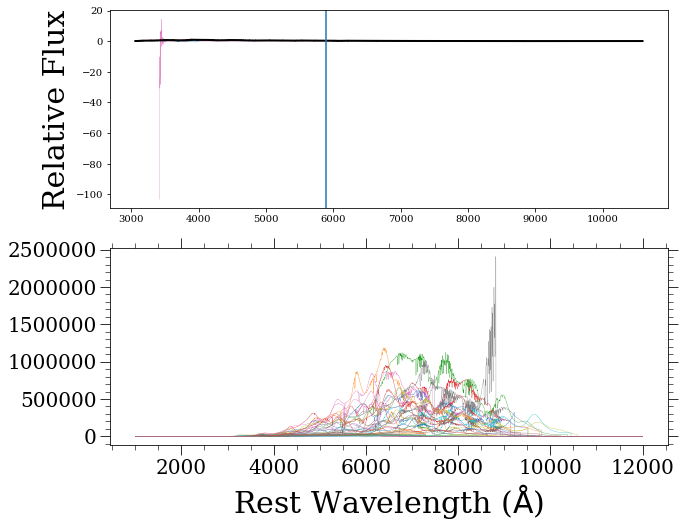

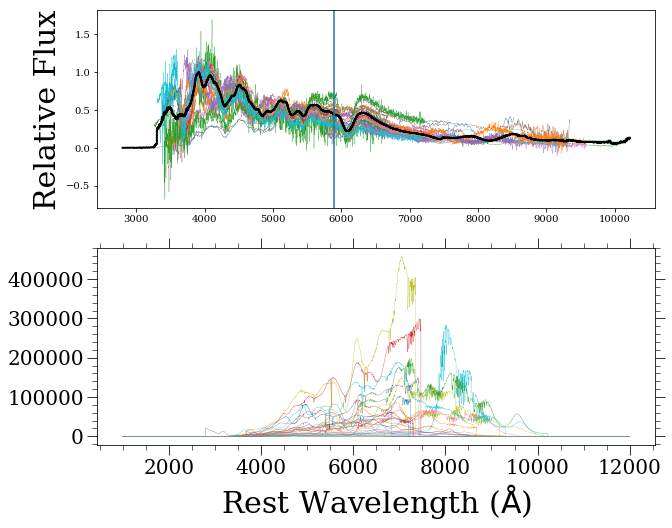

In [51]:
kplot.plot_comp_and_all_spectra(composites_test[0], sn_arrays_test[0], show_ivar=True)
kplot.plot_comp_and_all_spectra(composites_test[1], sn_arrays_test[1], show_ivar=True)

Phase:  -0.3995743859681052
dm15:  -0.7948249630707244
Redshift:  0.019301389940156063
HR:  0.24949508047154742
Phase:  -0.32939429235884143
dm15:  -0.9673759827467227
Redshift:  0.02178642593596804
HR:  55.35024324543857


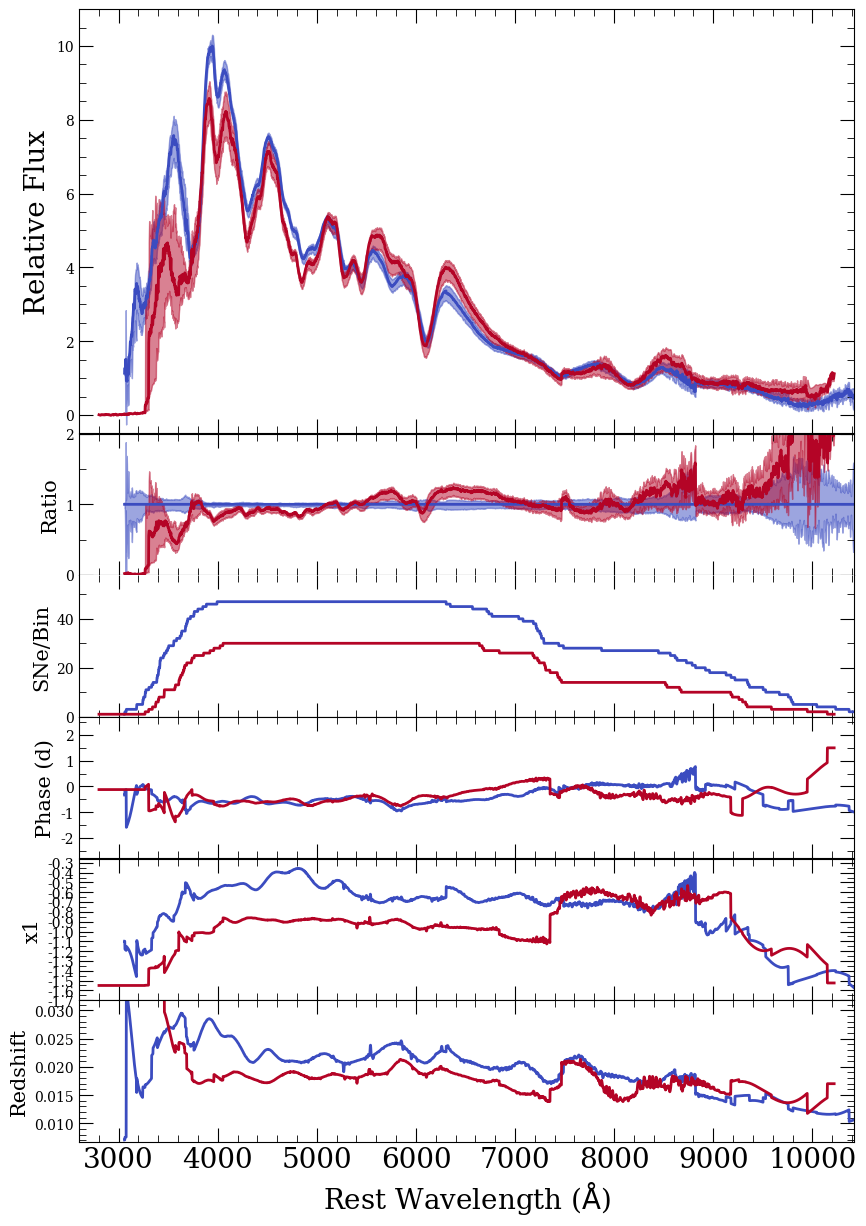

In [52]:
kpora.set_min_num_spec(composites_test, 5)
kplot.comparison_plot(composites_test, scale_type=False, min_num_show=1, extra=False, legend_labels = None,
                      savename = None)

-11.780310993061766
-12.565098143327868



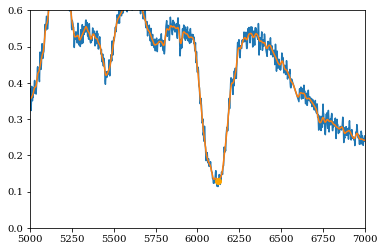

1996bo-50390.27.dat 3.02588731211
My v:  -11.290779369257717
Non-Rel v: -11.085952420141622
Kyle v:  -12.25
Reredshifted v:  -6.441631487923628


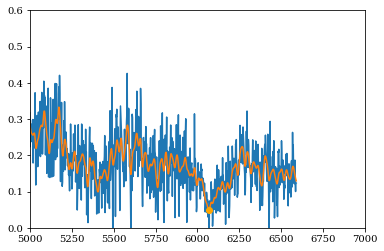

ps16bnz_20160406_kosmos_Foundation.dat -3.29536595464
My v:  -13.84440774713146
Non-Rel v: -13.539014232258065
Kyle v:  -12.6329
Reredshifted v:  -11.130501067301052


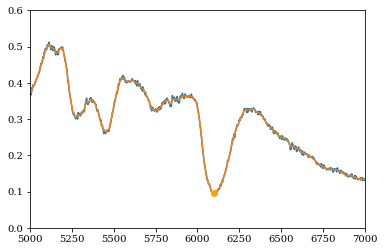

1998dh-51029.36.dat -0.292082732869
My v:  -12.368724114647867
Non-Rel v: -12.123786263729347
Kyle v:  -12.04
Reredshifted v:  -9.619128377237724


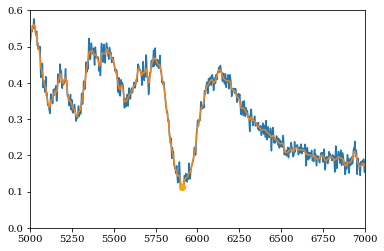

2006os-54061.18.dat -3.39074063703
My v:  -21.826537026037055
Non-Rel v: -21.086896731077893
Kyle v:  -11.911
Reredshifted v:  -12.385418775837463


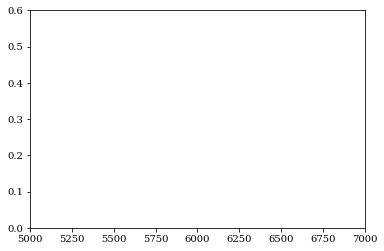

ps15atx_20150620_SALT_Foundation.dat -0.122152399995
My v:  -12.761590299337318
Non-Rel v: -12.501180388670338
Kyle v:  -14.89481
Reredshifted v:  -26.719083757353463


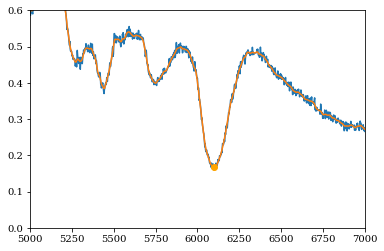

1997e-50464.25.dat -3.73654549572
My v:  -12.368724114647867
Non-Rel v: -12.123786263729347
Kyle v:  -12.01
Reredshifted v:  -8.345771529587438


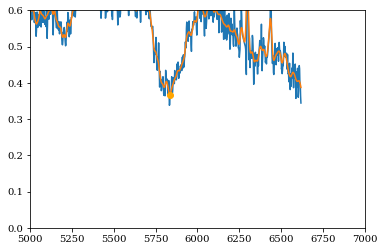

2005ku-53699.13.dat 0.560567050233
My v:  -25.47958315373969
Non-Rel v: -24.483443855546813
Kyle v:  -12.215
Reredshifted v:  -12.22089516494421


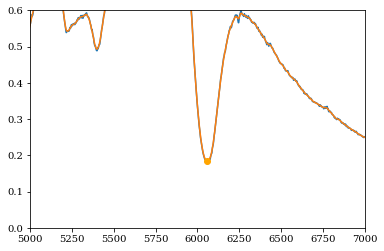

2007le-54401.07.dat 1.64204876113
My v:  -14.337777591065105
Non-Rel v: -14.010756888434305
Kyle v:  -13.31
Reredshifted v:  -12.307718782704335


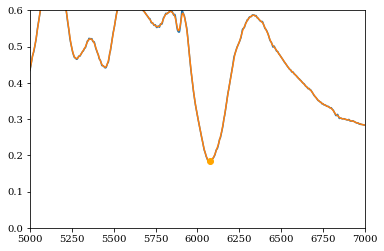

2002bo-52356.00.dat -1.2273042199
My v:  -13.548739780235412
Non-Rel v: -13.25596863855232
Kyle v:  -13.11
Reredshifted v:  -12.008524456901627


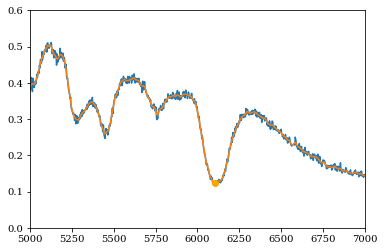

2006sr-54093.09.dat 0.207522934877
My v:  -11.976330519809686
Non-Rel v: -11.746392138788355
Kyle v:  -12.39
Reredshifted v:  -5.101777884114349


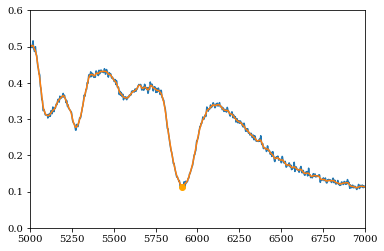

2007bd-54207.09.dat 0.313961669344
My v:  -21.72560261876043
Non-Rel v: -20.992548199842645
Kyle v:  -12.49
Reredshifted v:  -12.325716015102268


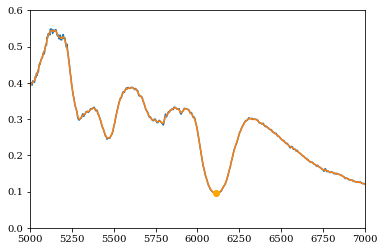

2006ef-53971.50.dat 1.49340232197
My v:  -11.780310993061766
Non-Rel v: -11.55769507631786
Kyle v:  -12.15
Reredshifted v:  -6.726178632747787


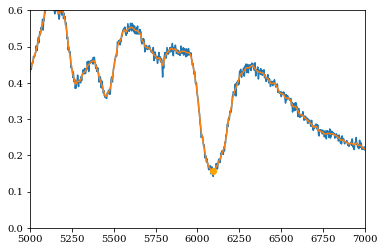

1998ef-51115.31.dat 1.56997352276
My v:  -12.565098143327868
Non-Rel v: -12.312483326199843
Kyle v:  -13.26
Reredshifted v:  -7.592406017657439


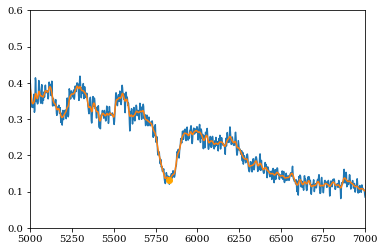

2006lu-54042.32.dat 3.45388733303
My v:  -25.683634954807275
Non-Rel v: -24.67214091801731
Kyle v:  -16.594405455
Reredshifted v:  -10.155288405666155


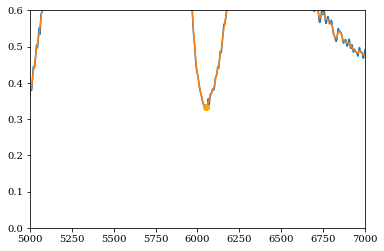

2005a-53381.00.dat -0.0640602221848
My v:  -14.733004167237274
Non-Rel v: -14.388151013375296
Kyle v:  -14.04517
Reredshifted v:  -9.289785905573133


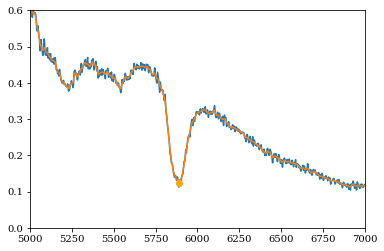

2006is-54013.36.dat -0.379679346086
My v:  -22.736260014720017
Non-Rel v: -21.93603351219512
Kyle v:  -14.122
Reredshifted v:  -13.52245297421712


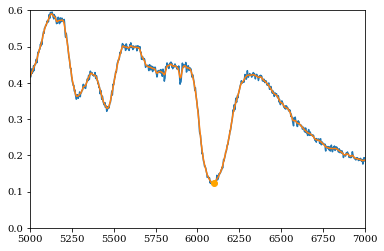

2001en-52193.39.dat 0.00162965780082
My v:  -12.466896361799964
Non-Rel v: -12.218134794964596
Kyle v:  -13.32
Reredshifted v:  -8.027285594867413


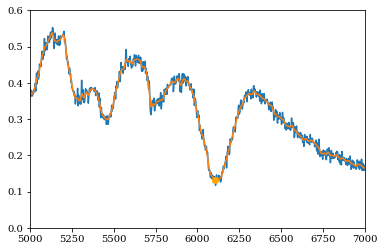

2004ef-53264.34.dat 0.0821060118688
My v:  -11.976330519809686
Non-Rel v: -11.746392138788355
Kyle v:  -12.29
Reredshifted v:  -3.1820337339393


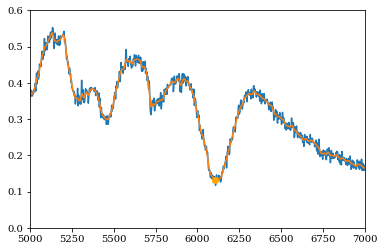

2004ef-53264.64.dat 0.373427371067
My v:  -11.976330519809686
Non-Rel v: -11.746392138788355
Kyle v:  -12.29
Reredshifted v:  -3.1820337339393


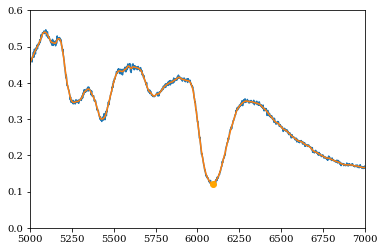

2002he-52584.60.dat -1.56498564564
My v:  -12.761590299337318
Non-Rel v: -12.501180388670338
Kyle v:  -12.62
Reredshifted v:  -5.412708536248335


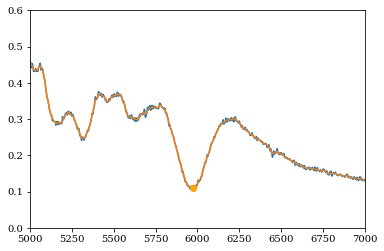

2007as-54178.07.dat -3.44316590669
My v:  -18.411176350635415
Non-Rel v: -17.879046669079468
Kyle v:  -12.962
Reredshifted v:  -13.207152567850859


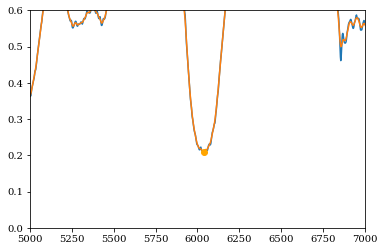

2006x-53785.00.dat -2.93680251438
My v:  -15.326728084622237
Non-Rel v: -14.954242200786783
Kyle v:  -13.90271
Reredshifted v:  -14.37359757470998


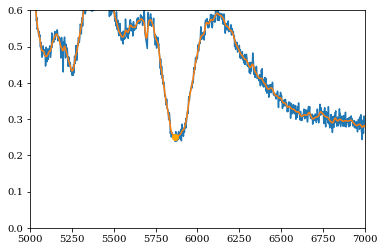

2007jg-54365.38.dat -1.1931319725
My v:  -23.95289680989148
Non-Rel v: -23.0682158870181
Kyle v:  -12.615
Reredshifted v:  -13.07193154391562


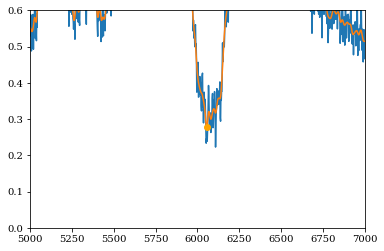

2006br-53855.18.dat 3.56035203872
My v:  -14.436540018845095
Non-Rel v: -14.105105419669552
Kyle v:  -14.174
Reredshifted v:  -6.8856534115943075


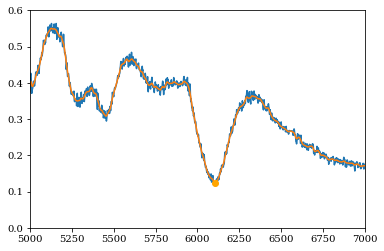

2004as-53085.27.dat -1.15002595973
My v:  -12.07438460450608
Non-Rel v: -11.840740670023605
Kyle v:  -11.84
Reredshifted v:  -2.6197274713542935


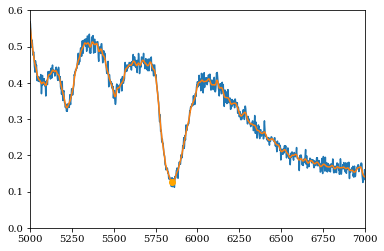

2007nq-54401.11.dat 2.70577550239
My v:  -24.766316043568047
Non-Rel v: -23.82300413690008
Kyle v:  -12.111
Reredshifted v:  -11.621132165221336


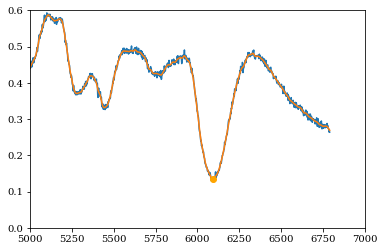

2017po_20170131_kosmos_Foundation.dat -0.813146340893
My v:  -12.761590299337318
Non-Rel v: -12.501180388670338
Kyle v:  -12.2767
Reredshifted v:  -3.376128996136623


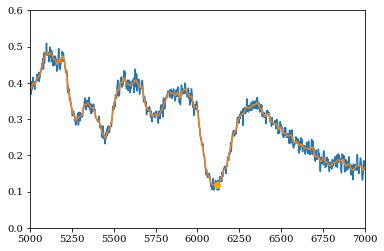

1999cc-51315.40.dat -0.134779895008
My v:  -11.388626576876426
Non-Rel v: -11.18030095137687
Kyle v:  -12.03
Reredshifted v:  -2.0880198538629697


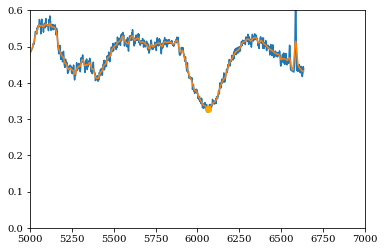

2017oz_20170131_kosmos_Foundation.dat -3.83016355391
My v:  -14.140341185775334
Non-Rel v: -13.822059825963809
Kyle v:  -13.6363
Reredshifted v:  2.095853729683416


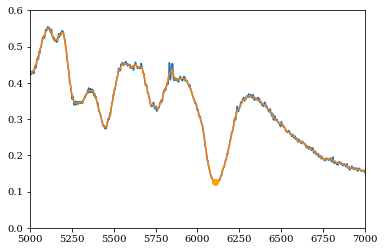

2005am-53437.25.dat 1.95348022129
My v:  -12.172468233516442
Non-Rel v: -11.935089201258851
Kyle v:  -12.157
Reredshifted v:  -9.876427599640497


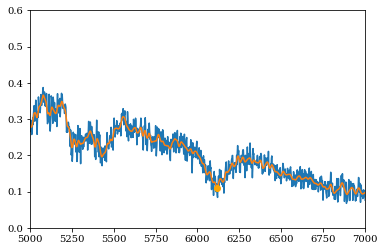

2006gr-54011.26.dat -2.14885093964
My v:  -11.486503345380463
Non-Rel v: -11.274649482612118
Kyle v:  -11.85
Reredshifted v:  -1.619473459905798


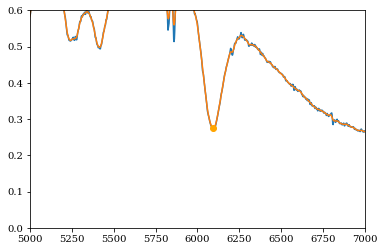

2008fp-54730.35.dat -0.700254260887
My v:  -12.565098143327868
Non-Rel v: -12.312483326199843
Kyle v:  -10.986
Reredshifted v:  -10.875647451310554


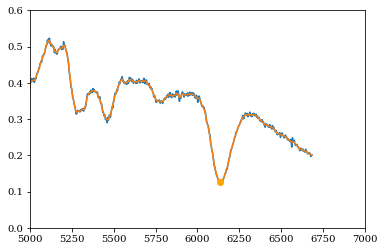

ps15aii_20150517_goodman_Foundation.dat -0.377604488655
My v:  -10.50906616967564
Non-Rel v: -10.331164170259637
Kyle v:  -10.20373
Reredshifted v:  2.049770022660391


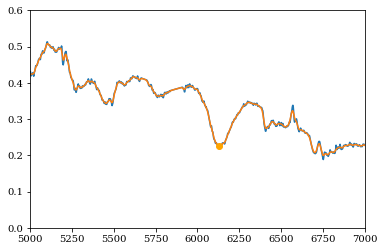

ps17bii_20170224_SALT_Foundation.dat -3.80066173463
My v:  -10.801986823599174
Non-Rel v: -10.614209763965382
Kyle v:  -10.31158
Reredshifted v:  -24.548823177252103


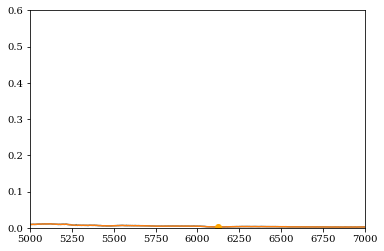

2006ob-54063.00.dat -0.381912167546
My v:  -11.192961724806997
Non-Rel v: -10.991603888906374
Kyle v:  -8.98163668913
Reredshifted v:  2.043354104887782


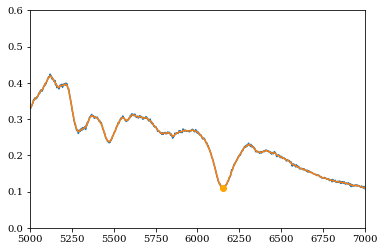

2002fk-52546.44.dat -1.60337867082
My v:  -9.729246126124085
Non-Rel v: -9.576375920377656
Kyle v:  -10.01
Reredshifted v:  -7.7306379964495155


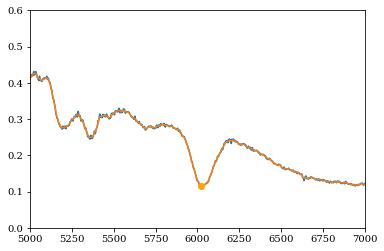

2006ax-53824.28.dat -3.1354028397
My v:  -16.020745999573485
Non-Rel v: -15.614681919433517
Kyle v:  -10.26
Reredshifted v:  -10.69231324468273


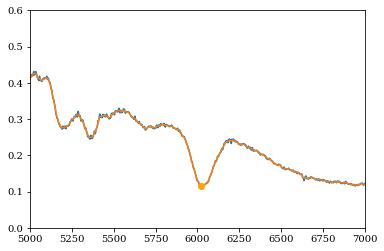

2006ax-53824.36.dat -3.05681499241
My v:  -16.020745999573485
Non-Rel v: -15.614681919433517
Kyle v:  -10.26
Reredshifted v:  -10.69231324468273


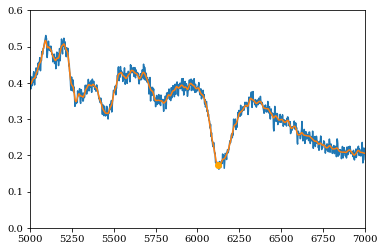

2006az-53825.37.dat -1.49011193631
My v:  -11.095173645785795
Non-Rel v: -10.897255357671126
Kyle v:  -10.72
Reredshifted v:  -1.81064627182866


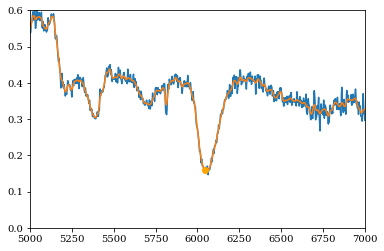

2005kc-53698.08.dat 0.377973611994
My v:  -14.930794290360334
Non-Rel v: -14.576848075845792
Kyle v:  -10.63
Reredshifted v:  -10.800175883003865


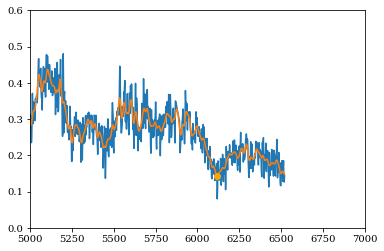

ps15bwh_20150914_goodman_Foundation.dat 0.0272594299711
My v:  -11.486503345380463
Non-Rel v: -11.274649482612118
Kyle v:  -11.24996
Reredshifted v:  -25.62317771780426


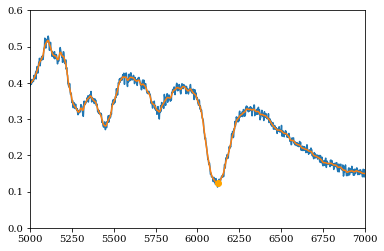

2005ki-53706.52.dat 1.28777849203
My v:  -11.290779369257717
Non-Rel v: -11.085952420141622
Kyle v:  -11.28
Reredshifted v:  -5.246036687107169


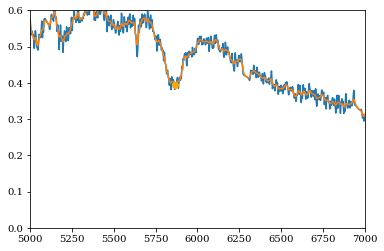

2006hx-54018.27.dat -3.77501090429
My v:  -23.95289680989148
Non-Rel v: -23.0682158870181
Kyle v:  -10.593
Reredshifted v:  -10.671684329671963
ps15cfn_20151011_goodman_Foundation.dat -3.84788948373
My v:  nan
Non-Rel v: nan
Kyle v:  -10.11722
Reredshifted v:  -15.153544085495998


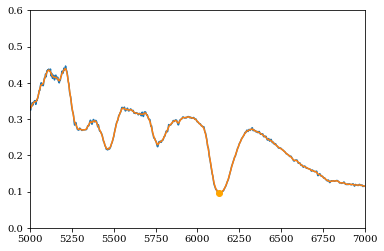

2007bc-54200.30.dat -0.00897946290624
My v:  -10.801986823599174
Non-Rel v: -10.614209763965382
Kyle v:  -10.49
Reredshifted v:  -4.322000819508422


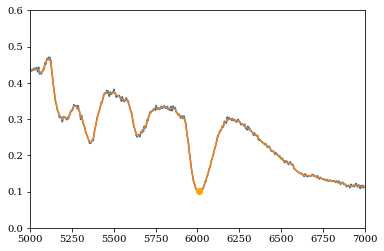

2007bc-54202.14.dat 1.79164955592
My v:  -16.815675012670447
Non-Rel v: -16.3694701693155
Kyle v:  -10.49
Reredshifted v:  -10.344869873324708


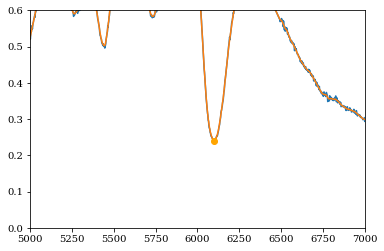

2007bm-54228.20.dat 3.24241559366
My v:  -12.270581404388267
Non-Rel v: -12.0294377324941
Kyle v:  -10.817
Reredshifted v:  -10.28401906212151


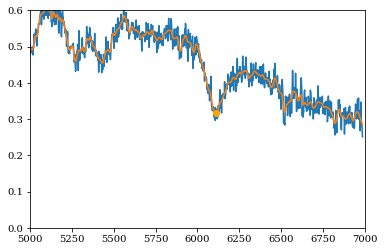

2017cpu_20170403_FLWO_Foundation.dat -1.37107201269
My v:  -11.780310993061766
Non-Rel v: -11.55769507631786
Kyle v:  -11.45211
Reredshifted v:  2.027558243805931
2007on-54421.22.dat 1.15506115312
My v:  nan
Non-Rel v: nan
Kyle v:  -11.242
Reredshifted v:  nan


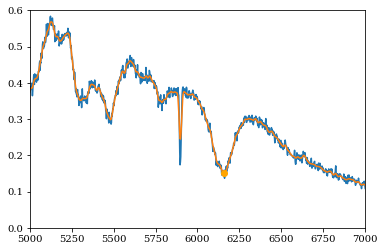

2006et-53996.36.dat 2.03493640917
My v:  -9.340046364602408
Non-Rel v: -9.198981795436666
Kyle v:  -10.123
Reredshifted v:  -2.7721293653103545


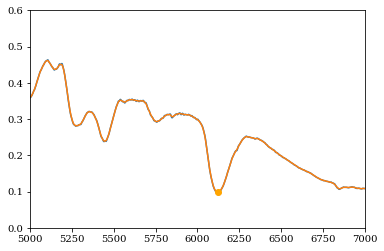

1996x-50191.00.dat -0.331540293328
My v:  -11.290779369257717
Non-Rel v: -11.085952420141622
Kyle v:  -11.17
Reredshifted v:  -9.180711479666233


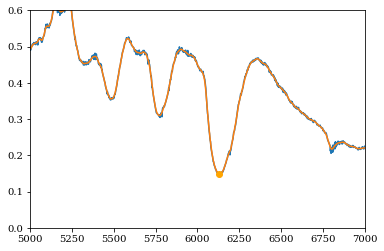

2008r-54496.03.dat 2.24003522481
My v:  -10.801986823599174
Non-Rel v: -10.614209763965382
Kyle v:  -9.81897059953
Reredshifted v:  -6.788339571858322


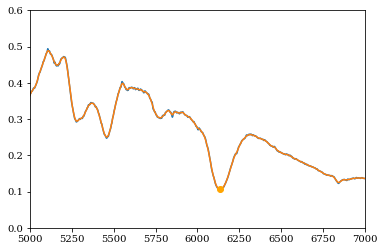

2005cf-53533.00.dat -1.23760344008
My v:  -10.606676809804412
Non-Rel v: -10.425512701494887
Kyle v:  -10.34
Reredshifted v:  -8.504228209578228


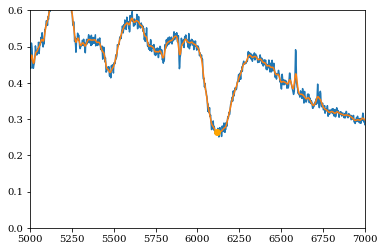

2008c-54470.00.dat 2.29520681481
My v:  -11.584409672466169
Non-Rel v: -11.368998013847364
Kyle v:  -10.8735993851
Reredshifted v:  -6.650439554138723


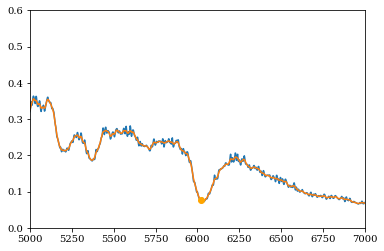

2004ey-53303.06.dat -1.43837392439
My v:  -16.219301744747316
Non-Rel v: -15.803378981904013
Kyle v:  -11.204
Reredshifted v:  -11.823546719874502


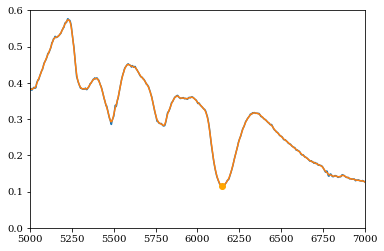

2004eo-53280.00.dat 1.55320223072
My v:  -9.92402359558339
Non-Rel v: -9.765072982848151
Kyle v:  -10.57
Reredshifted v:  -5.538301730023334


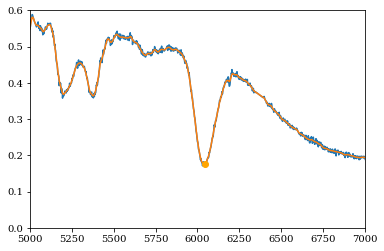

2007ca-54228.25.dat 0.593509027032
My v:  -15.128702271077849
Non-Rel v: -14.765545138316288
Kyle v:  -11.085
Reredshifted v:  -10.649831377143725


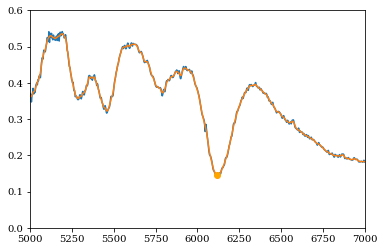

2001da-52106.00.dat -2.13041108781
My v:  -11.486503345380463
Non-Rel v: -11.274649482612118
Kyle v:  -11.53
Reredshifted v:  -6.738857645418002


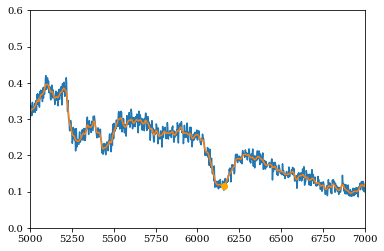

2002hu-52591.25.dat -1.15195216362
My v:  -9.534587044015712
Non-Rel v: -9.38767885790716
Kyle v:  -9.88
Reredshifted v:  1.7085669794054774


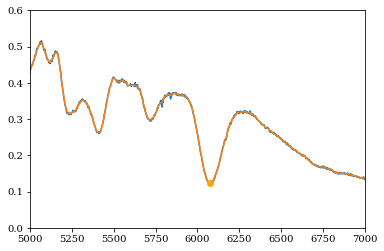

2006d-53759.32.dat 1.78567225121
My v:  -13.450242798100463
Non-Rel v: -13.161620107317074
Kyle v:  -10.62228
Reredshifted v:  -10.78652812730548


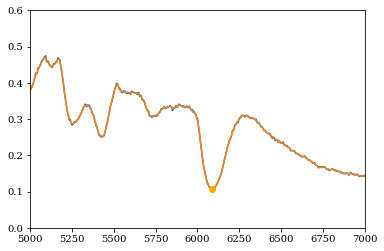

2007af-54173.30.dat -1.20448191458
My v:  -12.859880668678267
Non-Rel v: -12.595528919905586
Kyle v:  -10.99
Reredshifted v:  -10.951011754496893


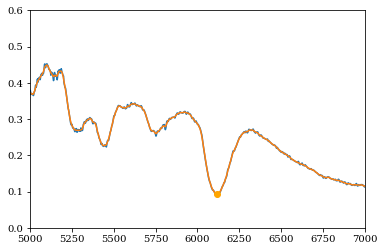

2006n-53759.30.dat -1.66287015573
My v:  -11.486503345380463
Non-Rel v: -11.274649482612118
Kyle v:  -11.32
Reredshifted v:  -7.2429553573516054


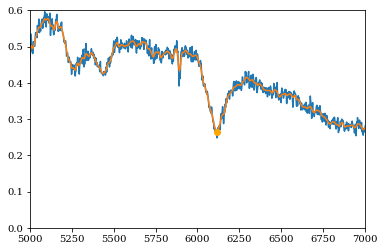

2002de-52431.22.dat -2.85629104486
My v:  -11.584409672466169
Non-Rel v: -11.368998013847364
Kyle v:  -11.44
Reredshifted v:  -3.2336091448072204


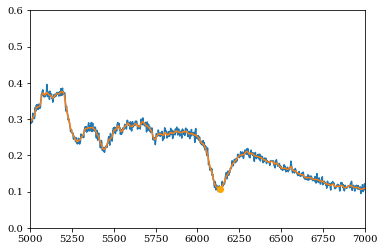

2005na-53739.34.dat -1.20799003717
My v:  -10.606676809804412
Non-Rel v: -10.425512701494887
Kyle v:  -10.74
Reredshifted v:  -2.673060417664505


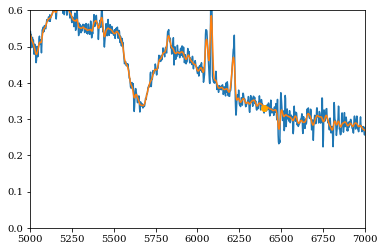

2006fw-54005.16.dat 2.61929155817
My v:  2.0216308539835866
Non-Rel v: 2.0284934215578287
Kyle v:  -10.819
Reredshifted v:  -10.089601489454843


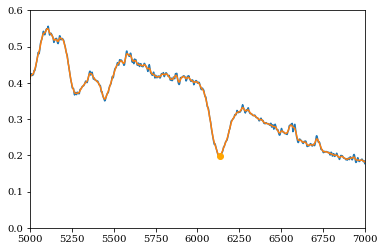

2005hj-53675.00.dat 0.596612191273
My v:  -10.704317028490788
Non-Rel v: -10.519861232730133
Kyle v:  -10.538
Reredshifted v:  2.0498625057817246


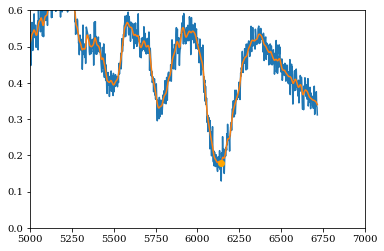

ps16cqa_20160608_kosmos_Foundation.dat 1.5218722904
My v:  -10.411485110219218
Non-Rel v: -10.23681563902439
Kyle v:  -10.24571
Reredshifted v:  1.5717933110426485


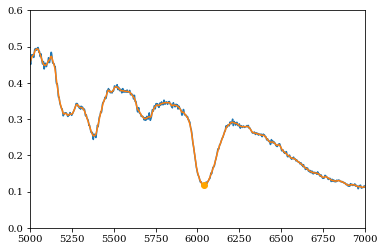

2005el-53648.38.dat 1.72242414035
My v:  -15.326728084622237
Non-Rel v: -14.954242200786783
Kyle v:  -10.8
Reredshifted v:  -10.903214704426826


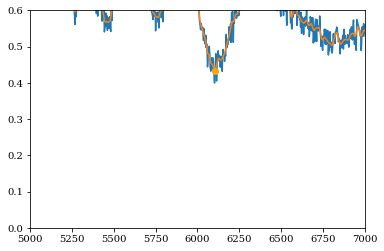

2005mc-53731.37.dat 0.882399629341
My v:  -12.172468233516442
Non-Rel v: -11.935089201258851
Kyle v:  -11.2819304526
Reredshifted v:  -4.717625169831644


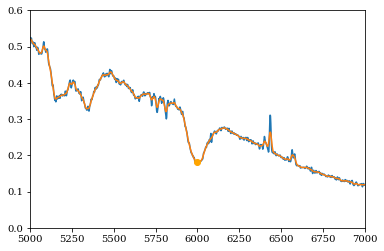

2005bg-53472.21.dat 1.80251497943
My v:  -17.413106748496762
Non-Rel v: -16.93556135672699
Kyle v:  -10.793
Reredshifted v:  -10.590680303978864


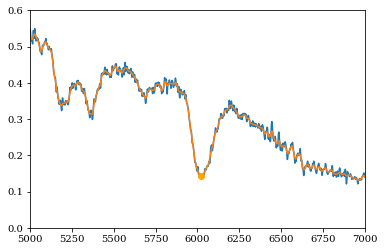

2007a-54113.04.dat -0.256960879689
My v:  -16.219301744747316
Non-Rel v: -15.803378981904013
Kyle v:  -5.05870229343
Reredshifted v:  -10.99093479033963


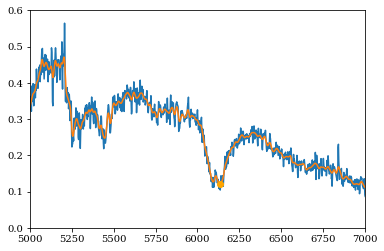

2005ag-53413.60.dat -1.07367973911
My v:  -10.704317028490788
Non-Rel v: -10.519861232730133
Kyle v:  -11.558
Reredshifted v:  -23.33143077320953


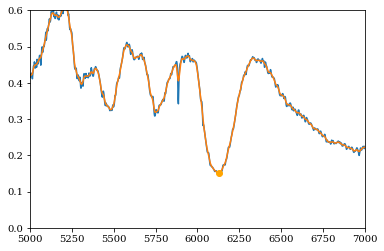

2004gs-53356.40.dat -0.443185636015
My v:  -10.997415134434632
Non-Rel v: -10.802906826435878
Kyle v:  -11.483
Reredshifted v:  -2.8647136420940615


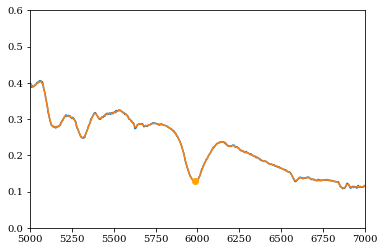

2008bf-54551.21.dat -3.82768397032
My v:  -17.811982230430747
Non-Rel v: -17.31295548166798
Kyle v:  -11.59
Reredshifted v:  -11.253313264716903


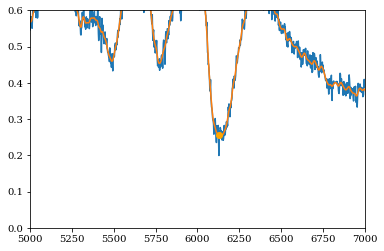

2006gj-54002.46.dat 2.52986638755
My v:  -10.899686192972935
Non-Rel v: -10.70855829520063
Kyle v:  -11.34
Reredshifted v:  -2.707507150830497


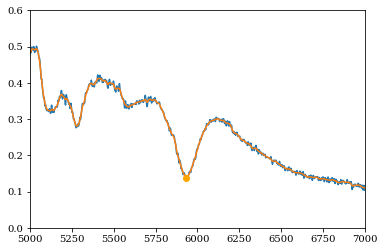

2008bq-54562.98.dat -0.799921661924
My v:  -20.51666882110082
Non-Rel v: -19.86036582501967
Kyle v:  -10.786
Reredshifted v:  -10.52676468750684


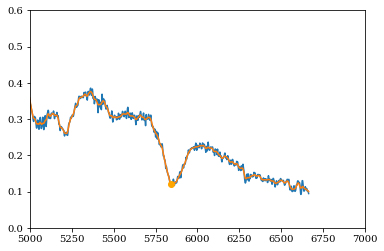

2005hc-53667.28.dat -0.308699314008
My v:  -25.071827749439823
Non-Rel v: -24.10604973060582
Kyle v:  -11.66
Reredshifted v:  -11.919371860025775


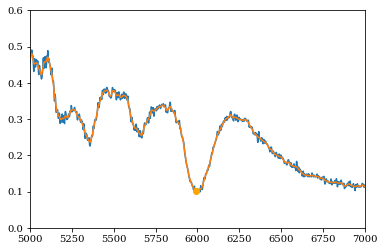

2006kf-54042.23.dat 1.16826290904
My v:  -17.512781557345757
Non-Rel v: -17.029909887962233
Kyle v:  -11.432
Reredshifted v:  -11.351367236923473


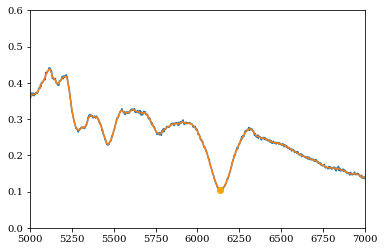

2002cr-52406.19.dat -2.70106644026
My v:  -10.50906616967564
Non-Rel v: -10.331164170259637
Kyle v:  -10.05
Reredshifted v:  -7.415901907919167


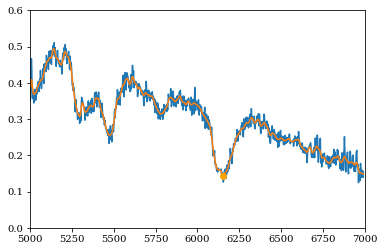

PS16fbb_20161201_flwo_Foundation.dat 3.31073102138
My v:  -9.729246126124085
Non-Rel v: -9.576375920377656
Kyle v:  -10.07551
Reredshifted v:  2.0778516104317024


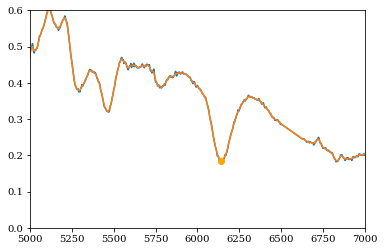

ps16fbb_20161125_SALT_Foundation.dat -2.38998156769
My v:  -10.216411741678657
Non-Rel v: -10.048118576553895
Kyle v:  -10.07551
Reredshifted v:  2.0778516104317024


In [55]:
comp_vels = []
for comp in composites_test:
    v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5800, 6400, plot=False)
    print v
    comp_vels.append(v)
    
print

c = 299792.458/1000.
high_vels = []
low_vels = []
for spec in og_sn_arrays_test[1]: #high velocity
#     test_wave = spec.wavelength*(1.+spec.event_data['z'])
    v, si_min_wave = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2], 5800, 6400, plot=True)
    v_red, si_min_wave_red = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2]*(1.+spec.event_data['z']), spec.flux[spec.x1:spec.x2], 5800, 6400, plot=False)
    print spec.filename, spec.phase
    print 'My v: ', v
    print 'Non-Rel v:', c*(si_min_wave - 6355.)/6355.
    print 'Kyle v: ',  spec.event_data['vel']
    print 'Reredshifted v: ', v_red
    if ~np.isnan(v):
        high_vels.append(v)
    
for spec in og_sn_arrays_test[0]: #low velocity
    v, si_min_wave = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2], 5800, 6400, plot=True)
    v_red, si_min_wave_red = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2]*(1.+spec.event_data['z']), spec.flux[spec.x1:spec.x2], 5800, 6400, plot=False)
    print spec.filename, spec.phase
    print 'My v: ', v
    print 'Non-Rel v:', c*(si_min_wave - 6355.)/6355.
    print 'Kyle v: ',  spec.event_data['vel']
    print 'Reredshifted v: ', v_red
    if ~np.isnan(v):
        low_vels.append(v)

[-12.565098143327868, -10.50906616967564, -10.801986823599174, -11.192961724806997, -9.729246126124085, -16.020745999573485, -16.020745999573485, -11.095173645785795, -14.930794290360334, -11.486503345380463, -11.290779369257717, -23.95289680989148, -10.801986823599174, -16.815675012670447, -12.270581404388267, -11.780310993061766, -9.340046364602408, -11.290779369257717, -10.801986823599174, -10.606676809804412, -11.584409672466169, -16.219301744747316, -9.92402359558339, -15.128702271077849, -11.486503345380463, -9.534587044015712, -13.450242798100463, -12.859880668678267, -11.486503345380463, -11.584409672466169, -10.606676809804412, 2.0216308539835866, -10.704317028490788, -10.411485110219218, -15.326728084622237, -12.172468233516442, -17.413106748496762, -16.219301744747316, -10.704317028490788, -10.997415134434632, -17.811982230430747, -10.899686192972935, -20.51666882110082, -25.071827749439823, -17.512781557345757, -10.50906616967564, -9.729246126124085, -10.216411741678657]


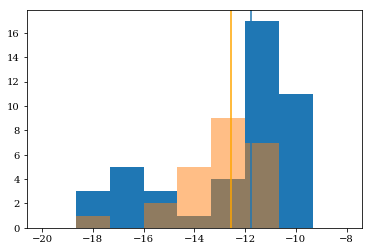

In [54]:
print low_vels
bins = np.linspace(-20,-8,num=10,retstep = True)[0]
plt.hist(low_vels, bins=bins)
plt.hist(high_vels, bins=bins, alpha=.5)
plt.gca().axvline(comp_vels[0])
plt.gca().axvline(comp_vels[1], color = 'orange')
plt.show()

In [ ]:
test_spec = np.transpose(np.genfromtxt('../../Foundation/Spectra/all_spec/2005el-53648.38.dat'))

[      nan 3744.1731 3747.1698 ... 9093.3325 9096.3292 9099.326 ]


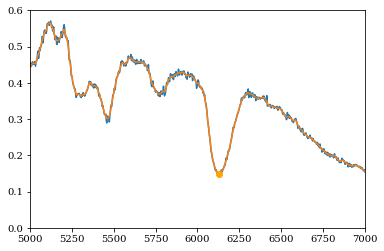

-10.969471411462274


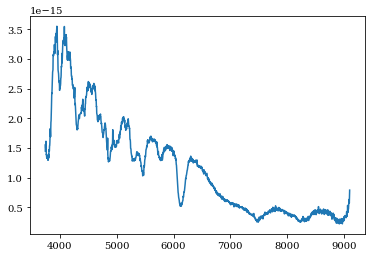

In [63]:
print test_spec[0]
v, si_min_wave = sa.measure_velocity(test_spec[0][1:], test_spec[1][1:], 5800, 6400, plot=True)
print v
plt.plot(test_spec[0][1:], test_spec[1][1:])
plt.show()